<a href="https://colab.research.google.com/github/SurekhaBerlin/Walmart-Sales-Data-Analysis-Sample/blob/main/WalmartSalesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [57]:
# Reading the data
## Importing the WalmartSalesData.csv file into a pandas data frame

sales = pd.read_csv("/content/WalmartSalesData.csv.csv")

In [58]:
sales.shape

(1000, 17)

In [59]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [60]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [61]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

There is no null values in the dataset

In [62]:
# Convert Timestamp column to datetime
sales['Time'] = pd.to_datetime(sales['Time'])

# Define time_of_day function
def time_of_day(hour):
    if hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply function to create time_of_day column
sales['time_of_day'] = sales['Time'].dt.hour.apply(time_of_day)


<ipython-input-62-ed53eca9e5f4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [63]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,time_of_day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-05-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-05-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-05-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-05-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-05-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Morning


In [91]:
# Convert Timestamp column to datetime
sales['Time'] = pd.to_datetime(sales['Time'])

# Extract day name
sales['day_name'] = sales['Time'].dt.day_name().str[:3]  # Extracts full day name and slices to first 3 letters

sales.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,time_of_day,day_name,month_name,Hour,Day_of_Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,Sat,May,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,Morning,Sat,May,10,Saturday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,Sat,May,13,Saturday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,Evening,Sat,May,20,Saturday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,Morning,Sat,May,10,Saturday


In [88]:
import pandas as pd

# Convert Timestamp column to datetime
sales['Time'] = pd.to_datetime(sales['Time'])

# Extract month name
sales['month_name'] = sales['Time'].dt.strftime('%b')  # Extracts abbreviated month name


In [90]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,time_of_day,day_name,month_name,Hour,Day_of_Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,Sat,May,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,Morning,Sat,May,10,Saturday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,Sat,May,13,Saturday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,Evening,Sat,May,20,Saturday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,Morning,Sat,May,10,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,Ewallet,40.35,4.761905,2.0175,6.2,Afternoon,Sat,May,13,Saturday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,Ewallet,973.80,4.761905,48.6900,4.4,Afternoon,Sat,May,17,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,4.761905,1.5920,7.7,Afternoon,Sat,May,13,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,4.761905,3.2910,4.1,Afternoon,Sat,May,15,Saturday


# Exploratory Data Analysis

1.Generic Questions


In [67]:
unique_cities = sales['City'].nunique()
print(f'The number of unique cities in the dataset is: {unique_cities}')

The number of unique cities in the dataset is: 3


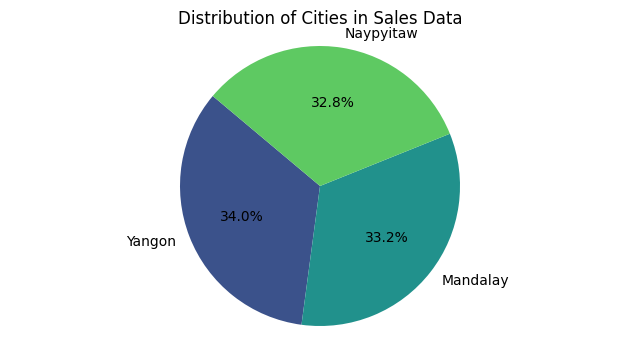

In [68]:


# Extract unique cities
unique_cities = sales['City'].unique()

# Count occurrences of each unique city
city_counts = sales['City'].value_counts()

# Generating colors from the "viridis" colormap
colors = sns.color_palette("viridis", len(city_counts))

# Plotting
plt.figure(figsize=(8, 4))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Cities in Sales Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [69]:

branch_city = sales[['Branch', 'City']].drop_duplicates().reset_index(drop=True)

print(branch_city)

  Branch       City
0      A     Yangon
1      C  Naypyitaw
2      B   Mandalay


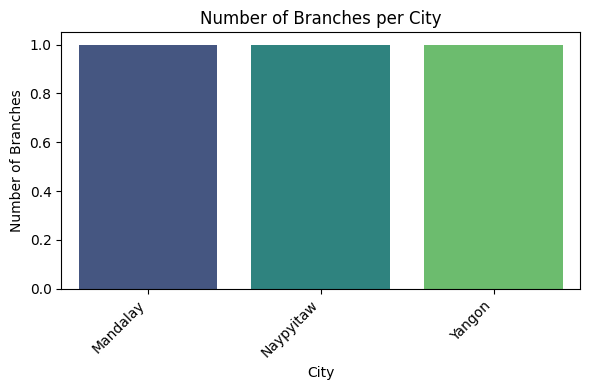

In [70]:
# Count the number of branches per city
city_branch_count = sales.groupby('City')['Branch'].nunique().reset_index()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=city_branch_count, x='City', y='Branch', palette='viridis',hue = 'City')
plt.title('Number of Branches per City')
plt.xlabel('City')
plt.ylabel('Number of Branches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


2.Product Analysis

In [71]:
unique_product_lines = sales['Product line'].nunique()

print(f'The number of unique product lines in the dataset is: {unique_product_lines}')


The number of unique product lines in the dataset is: 6


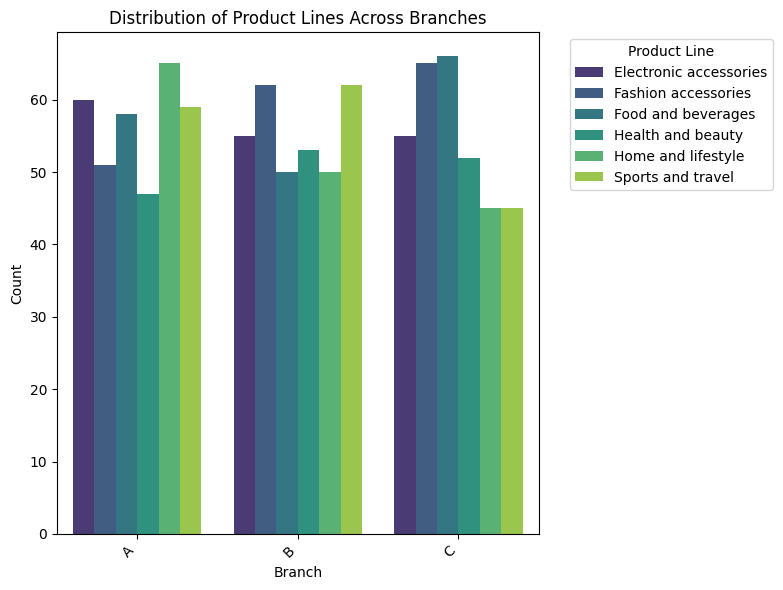

In [72]:
# Group by both 'Branch' and 'Product line', then count occurrences
branch_product_counts = sales.groupby(['Branch', 'Product line']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=branch_product_counts, x='Branch', y='Count', hue='Product line', palette='viridis')
plt.title('Distribution of Product Lines Across Branches')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
most_common_payment_method = sales['Payment'].mode()[0]

print(f'The most common payment method in the dataset is: {most_common_payment_method}')


The most common payment method in the dataset is: Ewallet


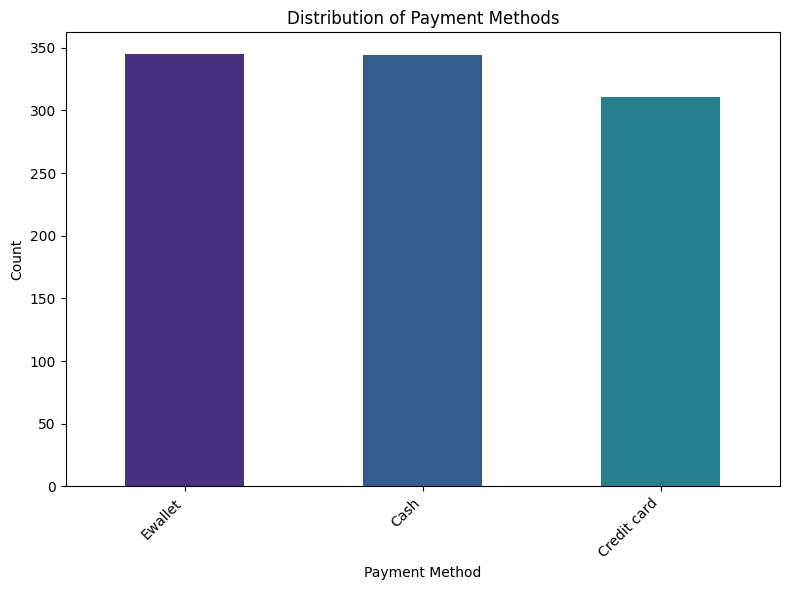

In [74]:
# Count occurrences of each payment method
payment_counts = sales['Payment'].value_counts()

# Setting color palette
sns.color_palette("rocket", as_cmap=True)

# Plotting
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='bar', color=sns.color_palette("viridis"))
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-75-17b211a24859>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_lines.index, y=top_product_lines.values, palette='viridis')


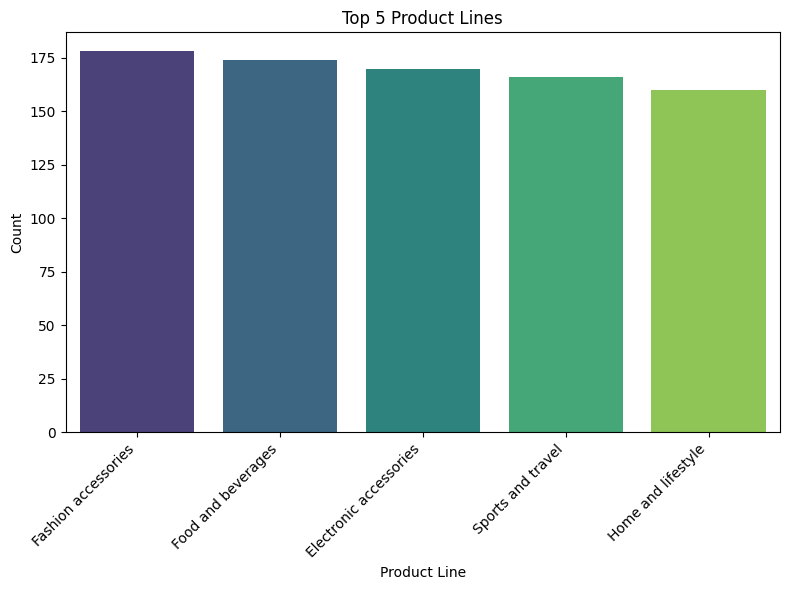

In [75]:
# Set the number of top product lines you want to plot
top_n = 5

# Count occurrences of each product line
product_line_counts = sales['Product line'].value_counts()

# Select the top N product lines
top_product_lines = product_line_counts.head(top_n)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=top_product_lines.index, y=top_product_lines.values, palette='viridis')
plt.title(f'Top {top_n} Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

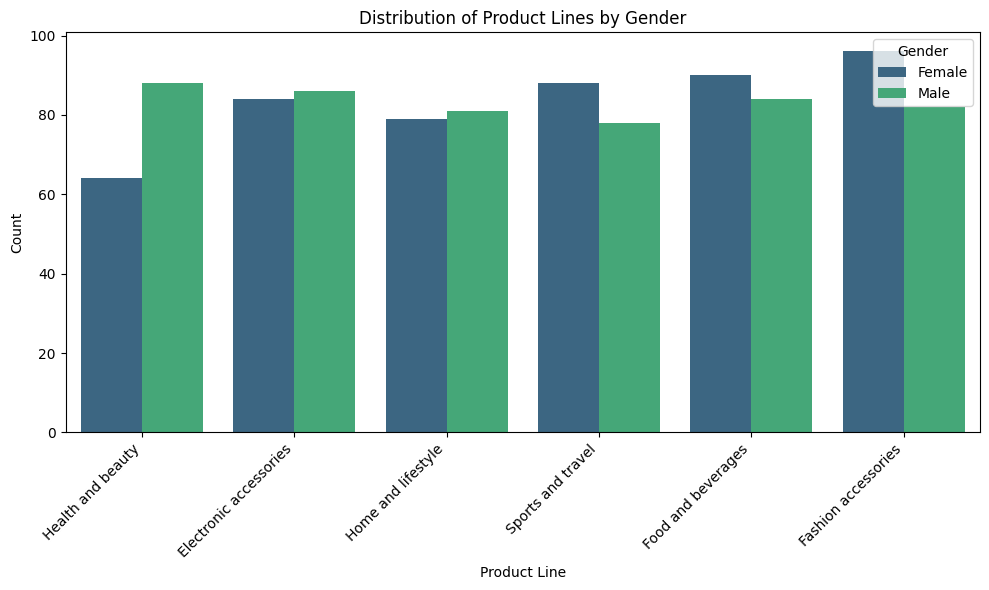

In [76]:


# Assuming 'sales' is your DataFrame with columns 'Product line' and 'Gender'
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=sales, x='Product line', hue='Gender', palette='viridis')
plt.title('Distribution of Product Lines by Gender')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [77]:
# Group by both 'Product line' and 'Gender', then count occurrences
product_line_gender_counts = sales.groupby(['Product line', 'Gender']).size().reset_index(name='Count')

# Filter for male and female separately and select top 5 product lines for each gender
top_product_lines_male = product_line_gender_counts[product_line_gender_counts['Gender'] == 'Male'] \
                            .nlargest(5, 'Count')

top_product_lines_female = product_line_gender_counts[product_line_gender_counts['Gender'] == 'Female'] \
                            .nlargest(5, 'Count')

print("Top 5 Product Lines for Male:")
print(top_product_lines_male)

print("\nTop 5 Product Lines for Female:")
print(top_product_lines_female)


Top 5 Product Lines for Male:
             Product line Gender  Count
7       Health and beauty   Male     88
1  Electronic accessories   Male     86
5      Food and beverages   Male     84
3     Fashion accessories   Male     82
9      Home and lifestyle   Male     81

Top 5 Product Lines for Female:
              Product line  Gender  Count
2      Fashion accessories  Female     96
4       Food and beverages  Female     90
10       Sports and travel  Female     88
0   Electronic accessories  Female     84
8       Home and lifestyle  Female     79


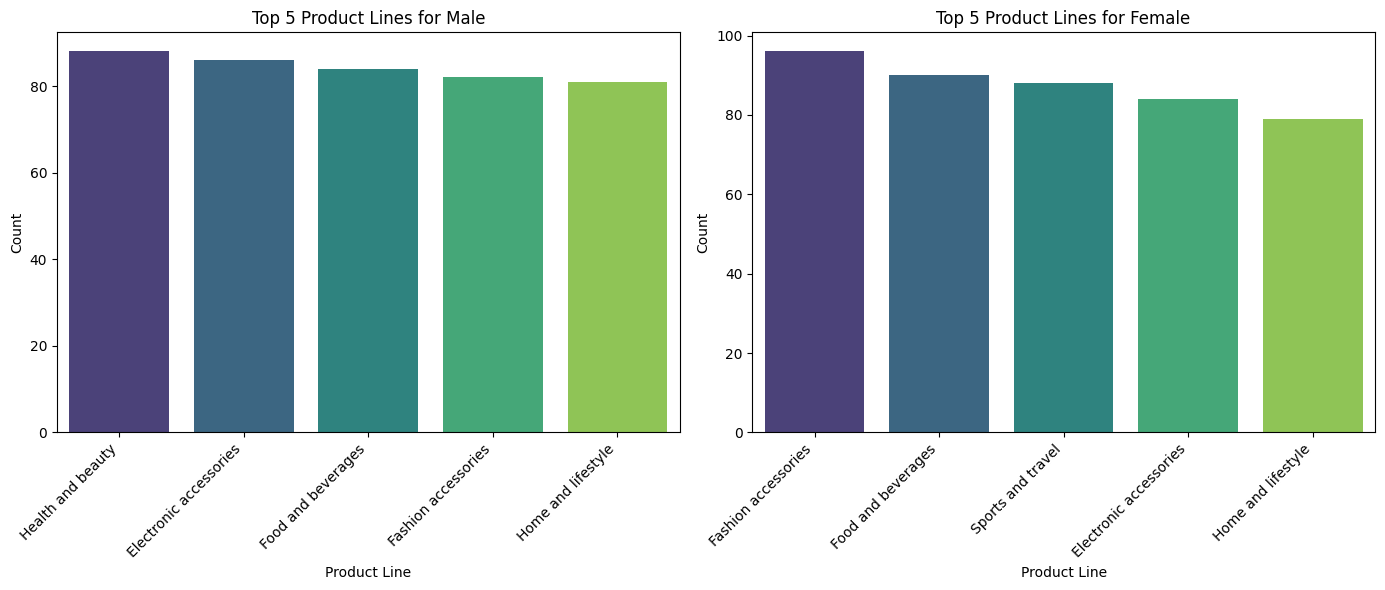

In [78]:
# Group by both 'Product line' and 'Gender', then count occurrences
product_line_gender_counts = sales.groupby(['Product line', 'Gender']).size().reset_index(name='Count')

# Filter for male and female separately and select top 5 product lines for each gender
top_product_lines_male = product_line_gender_counts[product_line_gender_counts['Gender'] == 'Male'] \
                            .nlargest(5, 'Count')

top_product_lines_female = product_line_gender_counts[product_line_gender_counts['Gender'] == 'Female'] \
                            .nlargest(5, 'Count')

# Plotting
plt.figure(figsize=(14, 6))

# Plot for Male
plt.subplot(1, 2, 1)
sns.barplot(data=top_product_lines_male, x='Product line', y='Count',hue = 'Product line', palette='viridis')
plt.title('Top 5 Product Lines for Male')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Plot for Female
plt.subplot(1, 2, 2)
sns.barplot(data=top_product_lines_female, x='Product line', y='Count',hue = 'Product line', palette='viridis')
plt.title('Top 5 Product Lines for Female')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


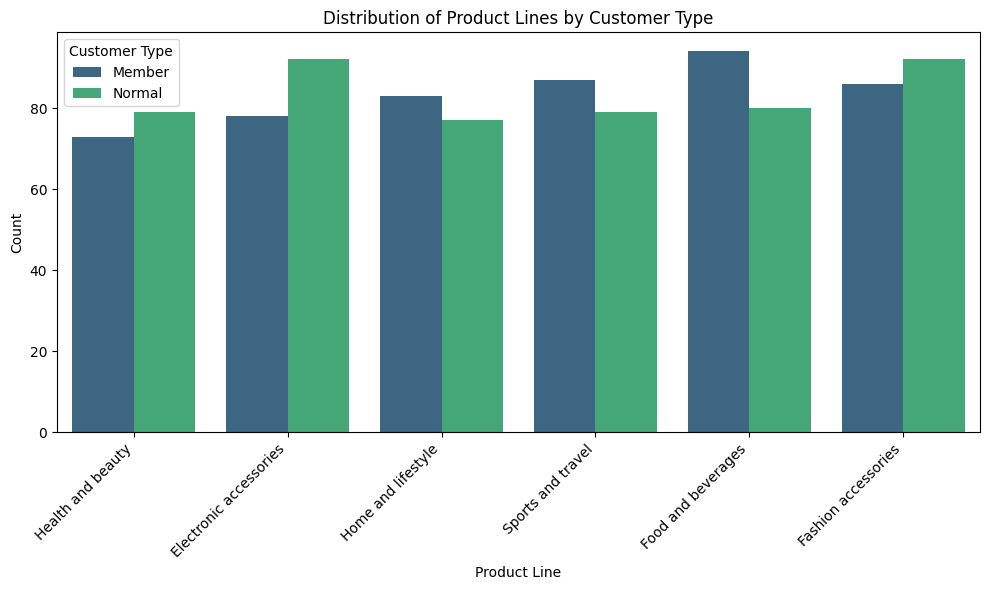

In [79]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=sales, x='Product line', hue='Customer type', palette='viridis')
plt.title('Distribution of Product Lines by Customer Type')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


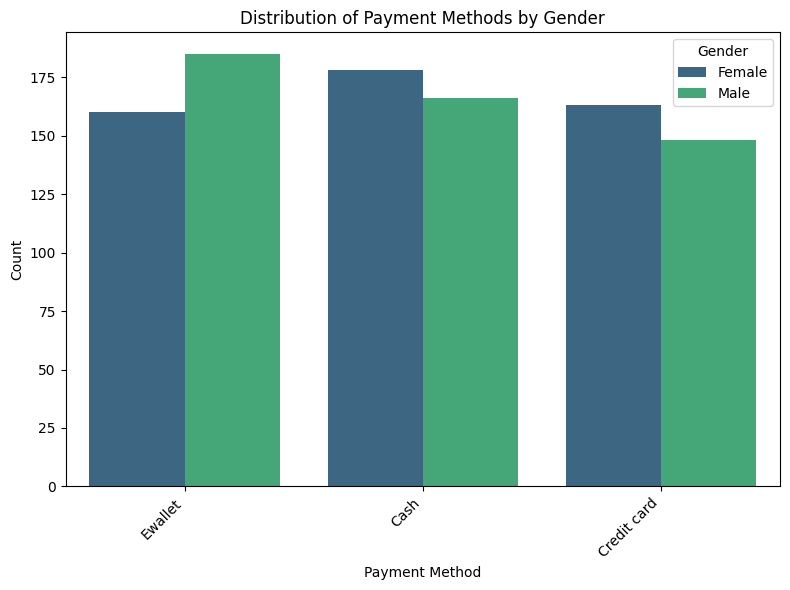

In [102]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=sales, x='Payment', hue='Gender', palette='viridis')
plt.title('Distribution of Payment Methods by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

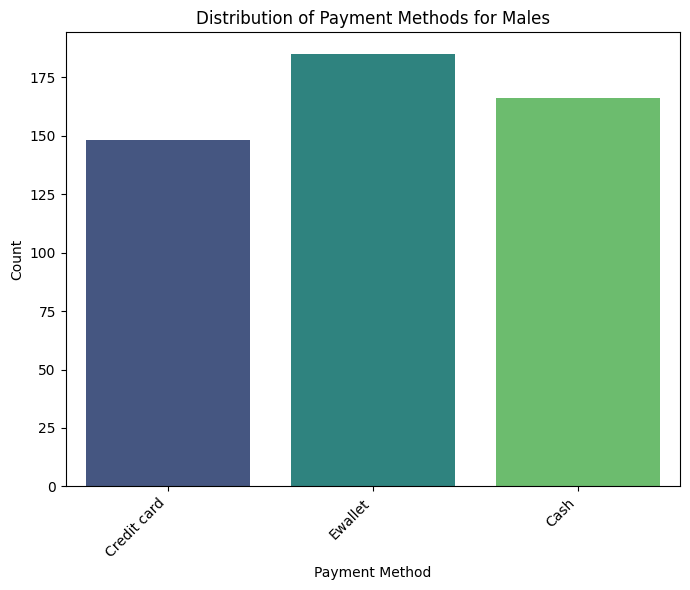

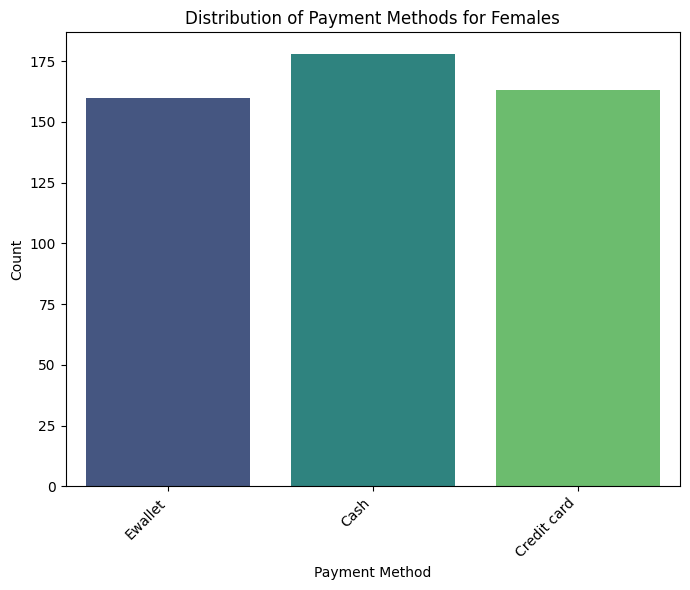

In [101]:
from pickle import FALSE
# Filter data for males and females
sales_male = sales[sales['Gender'] == 'Male']
sales_female = sales[sales['Gender'] == 'Female']

# Plotting for males
plt.figure(figsize=(7, 6))
sns.countplot(data=sales_male, x='Payment', hue = 'Payment' ,palette ='viridis')
plt.title('Distribution of Payment Methods for Males')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting for females
plt.figure(figsize=(7, 6))
sns.countplot(data=sales_female, x='Payment', hue = 'Payment' ,palette ='viridis')
plt.title('Distribution of Payment Methods for Females')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


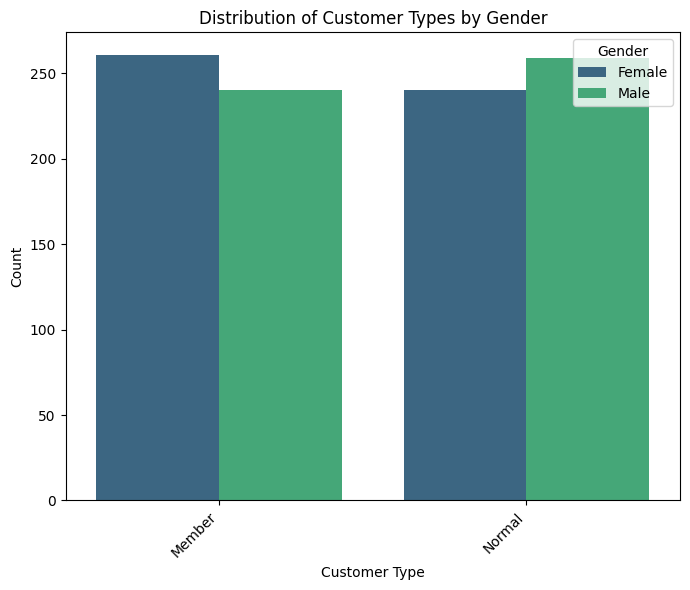

In [100]:
# Plotting
plt.figure(figsize=(7, 6))
sns.countplot(data=sales, x='Customer type', hue='Gender', palette='viridis')
plt.title('Distribution of Customer Types by Gender')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


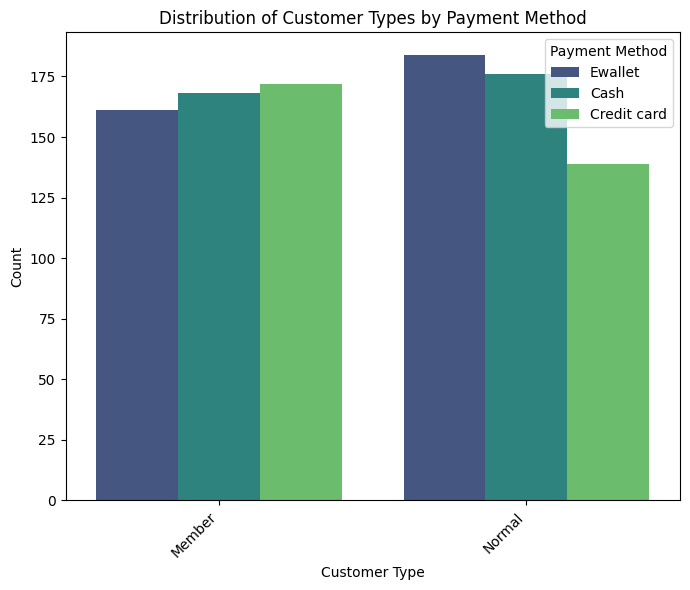

In [99]:
# Plotting
plt.figure(figsize=(7, 6))
sns.countplot(data=sales, x='Customer type', hue='Payment', palette='viridis')
plt.title('Distribution of Customer Types by Payment Method')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()


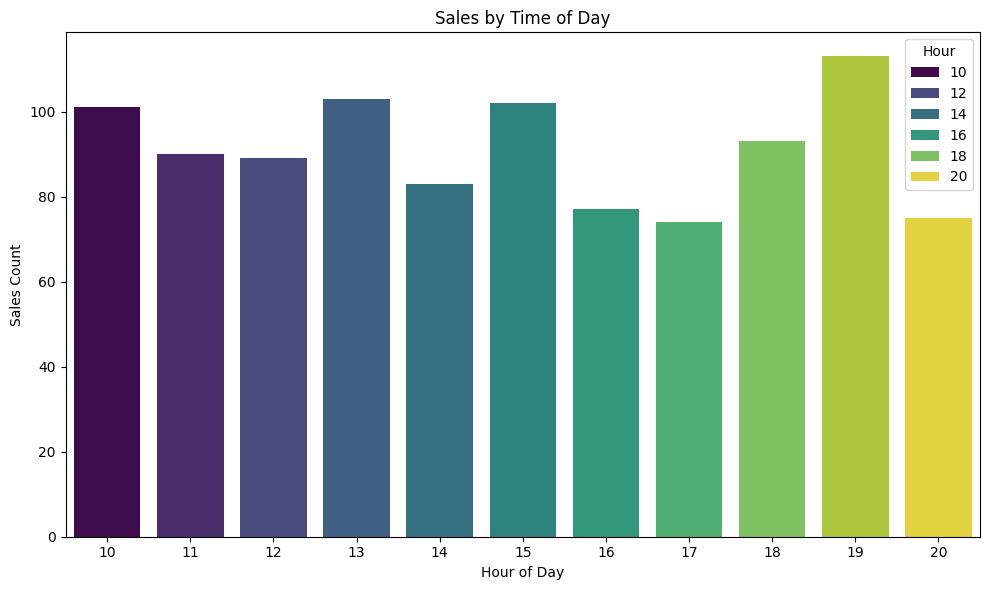

In [84]:

# Extracting hour from the timestamp
sales['Hour'] = sales['Time'].dt.hour

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=sales, x='Hour',hue = 'Hour', palette='viridis')
plt.title('Sales by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Sales Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


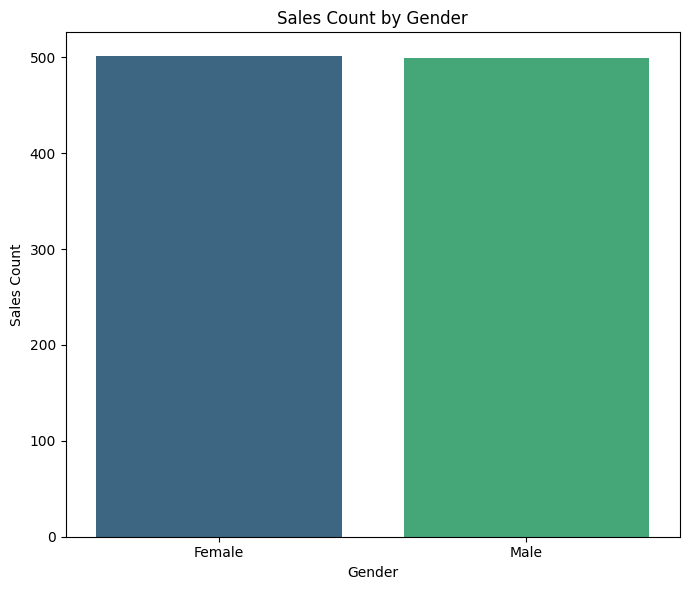

In [95]:
# Plotting
plt.figure(figsize=(7, 6))
sns.countplot(data=sales, x='Gender',hue ='Gender',palette='viridis')
plt.title('Sales Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Sales Count')
plt.tight_layout()
plt.show()


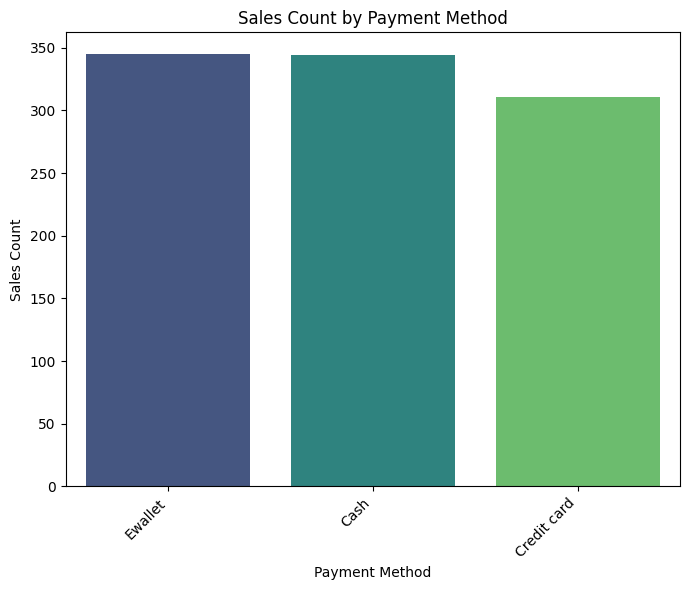

In [98]:
# Plotting
plt.figure(figsize=(7, 6))
sns.countplot(data=sales, x='Payment',hue ='Payment', palette='viridis')
plt.title('Sales Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
